## Criar um script que receba uma lista com os meses e gere as pastas e gráficos necessários para os meses.

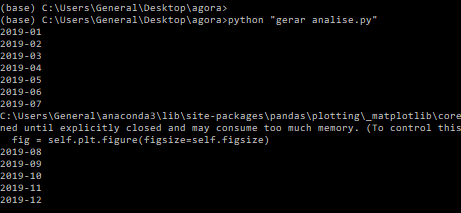

- Inclui o print do CMD para visualização das pastas criadas com o script abaixo

2019-01
2019-02
2019-03
2019-04
2019-05
2019-06
2019-07


C:\Users\General\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


2019-08
2019-09
2019-10
2019-11
2019-12


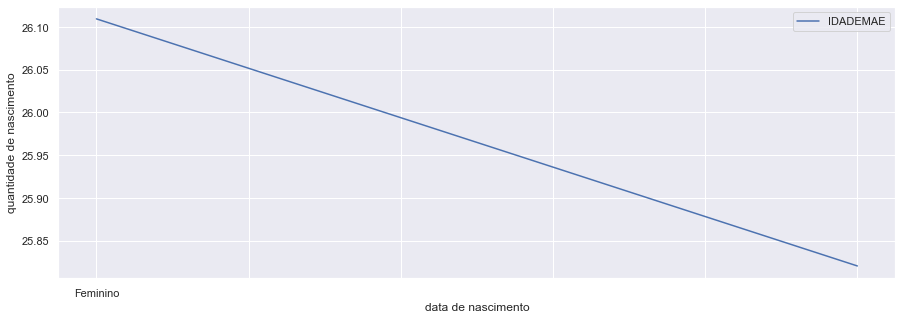

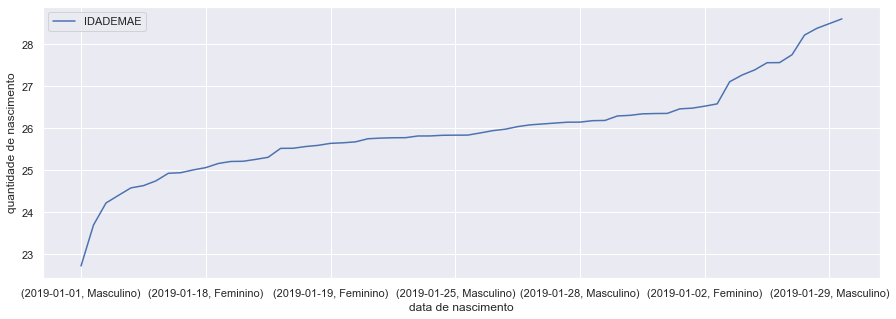

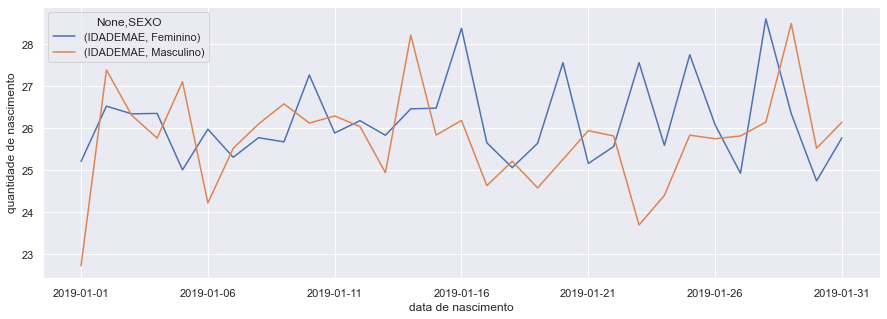

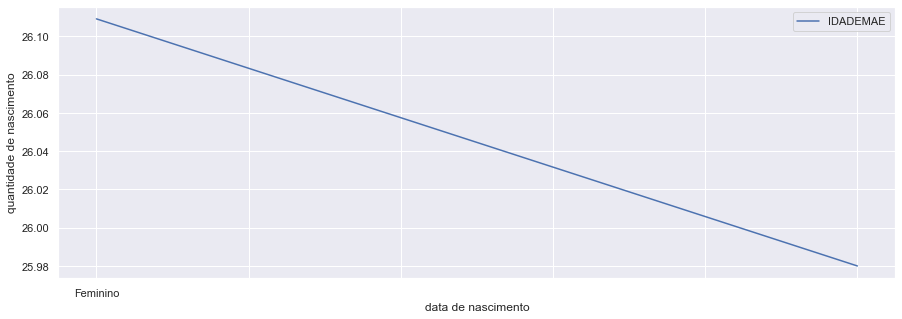

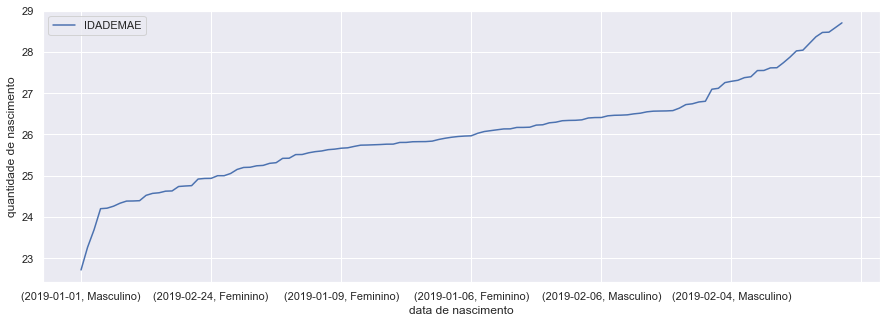

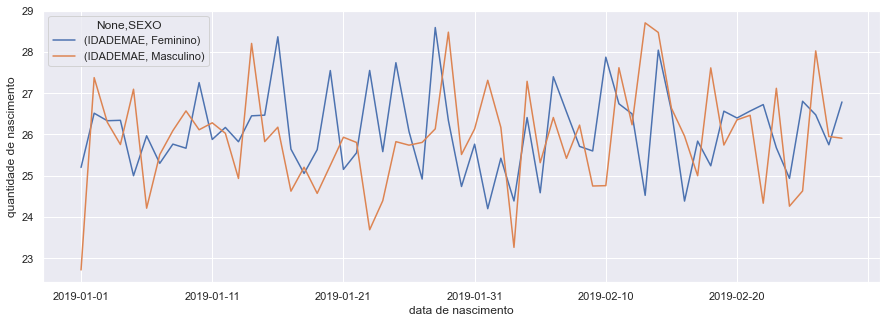

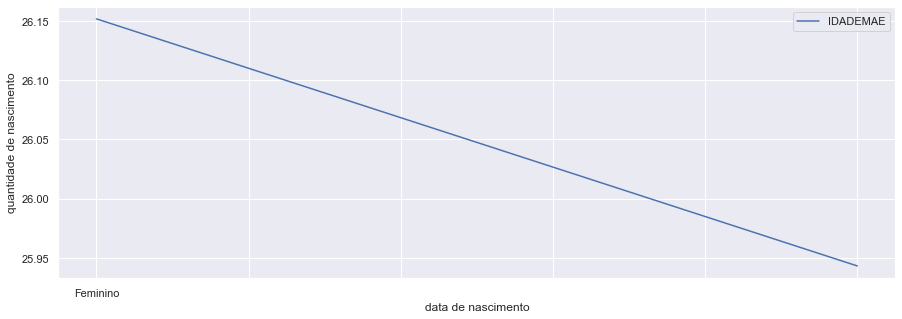

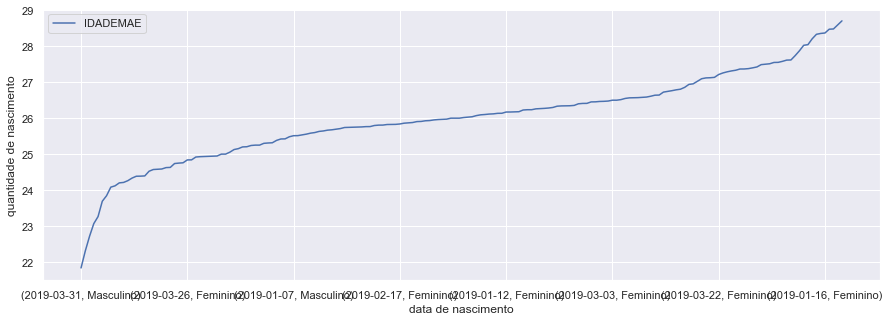

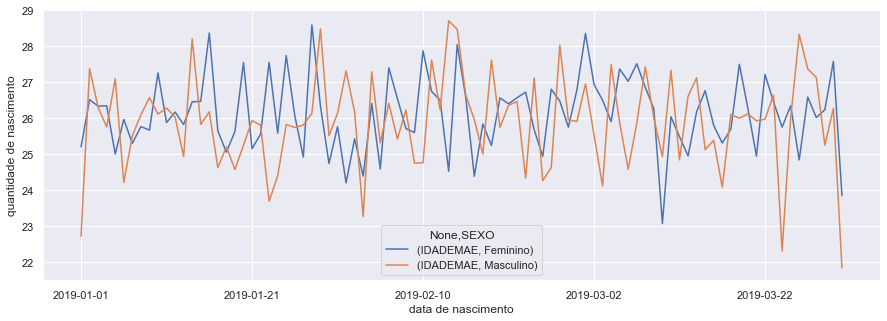

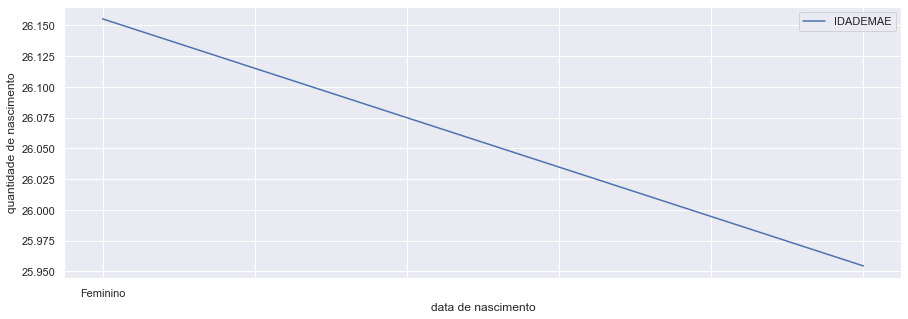

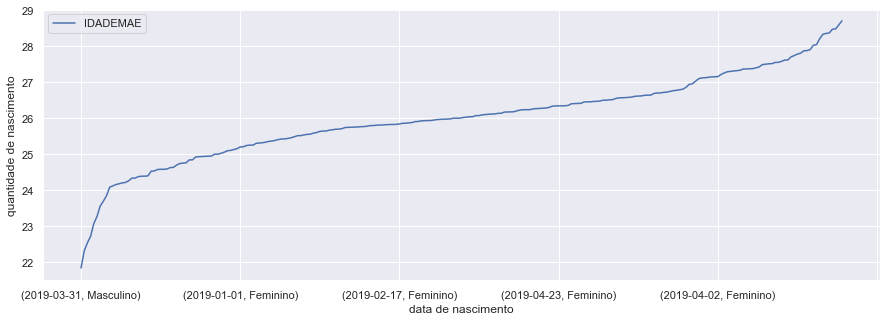

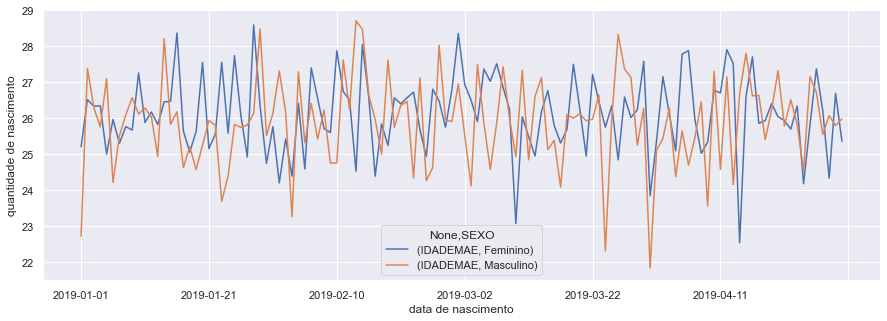

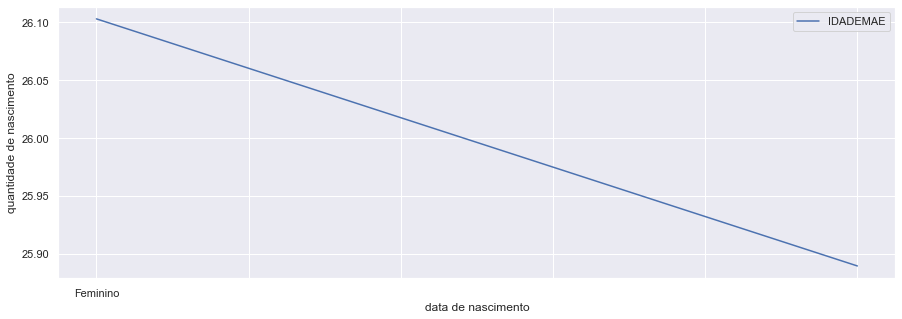

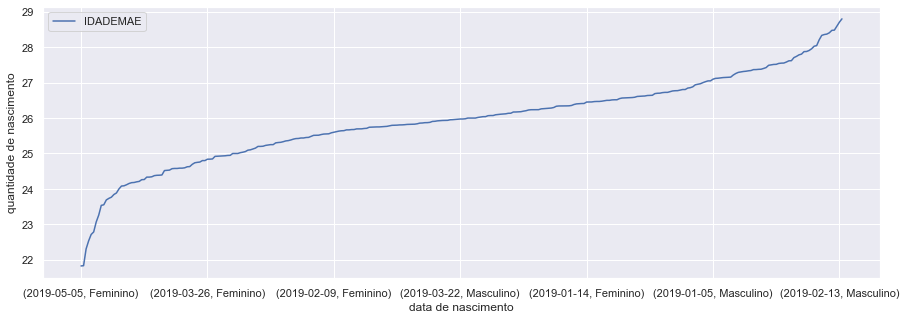

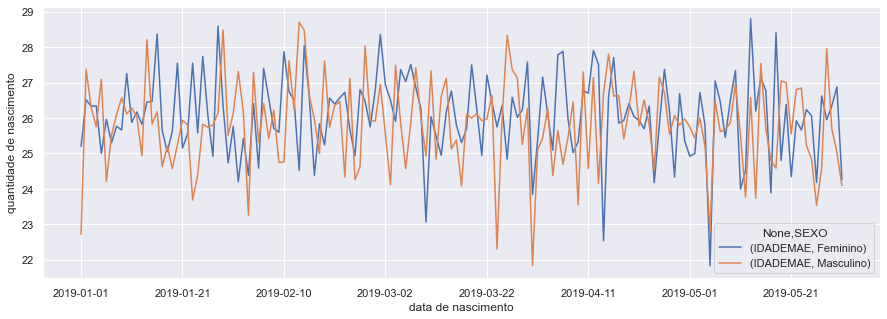

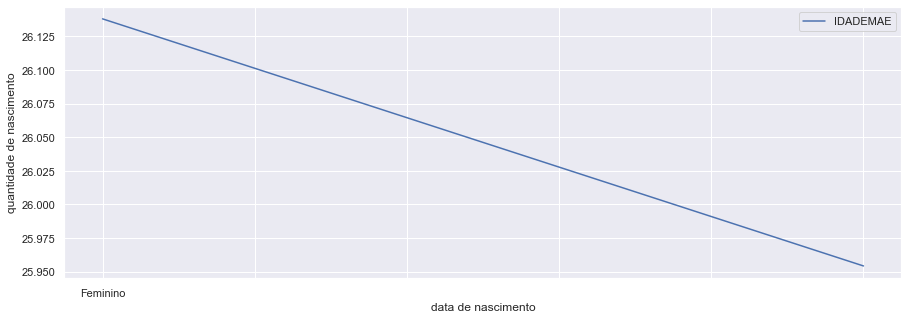

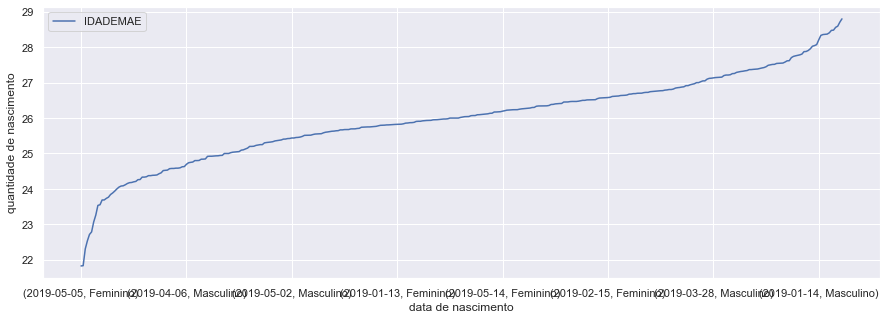

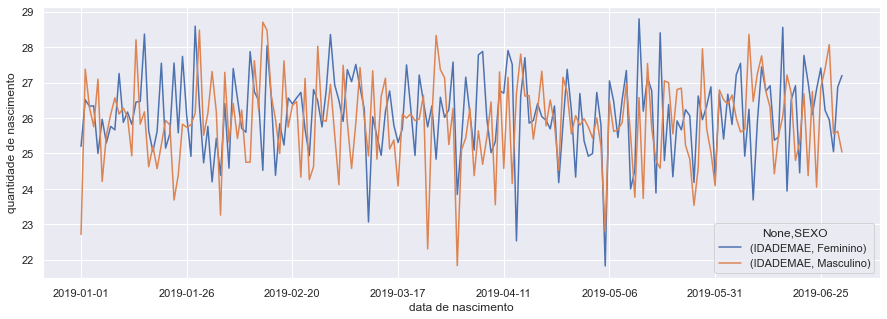

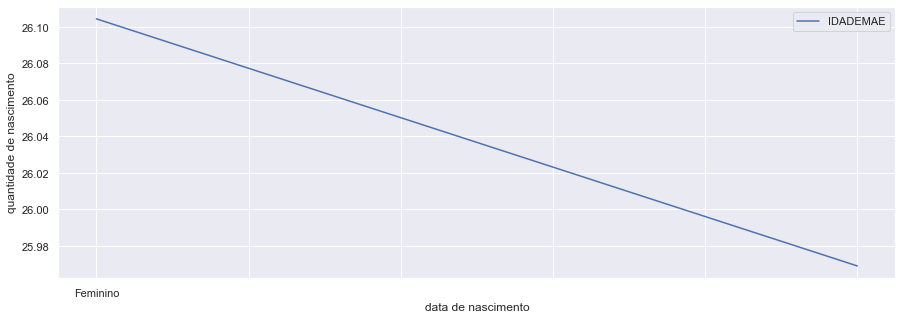

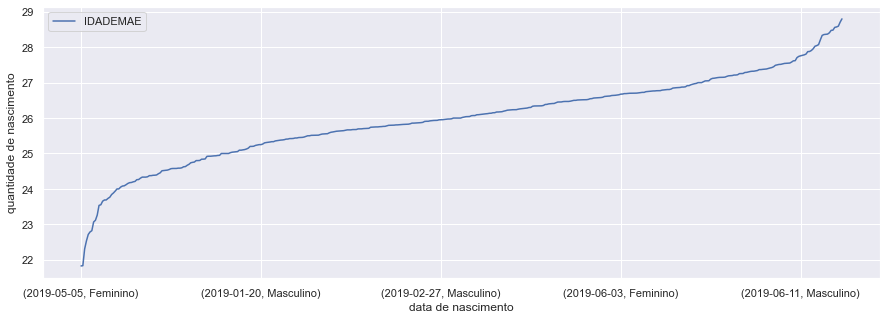

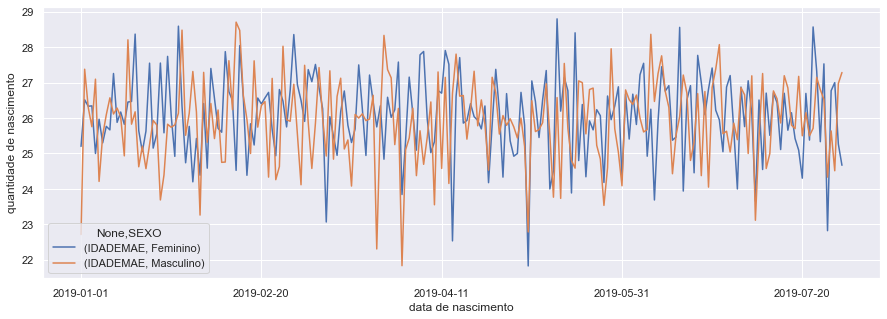

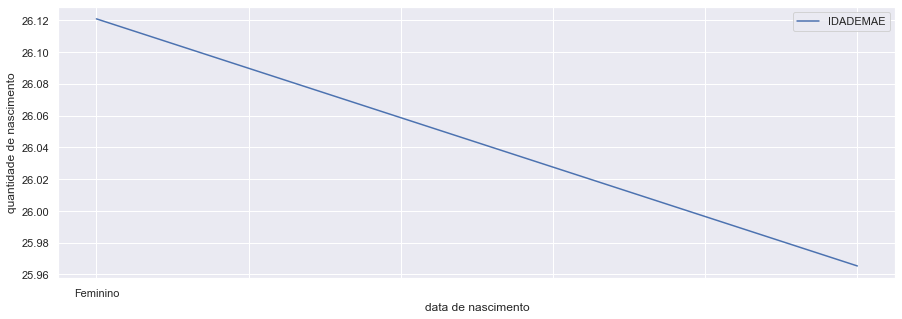

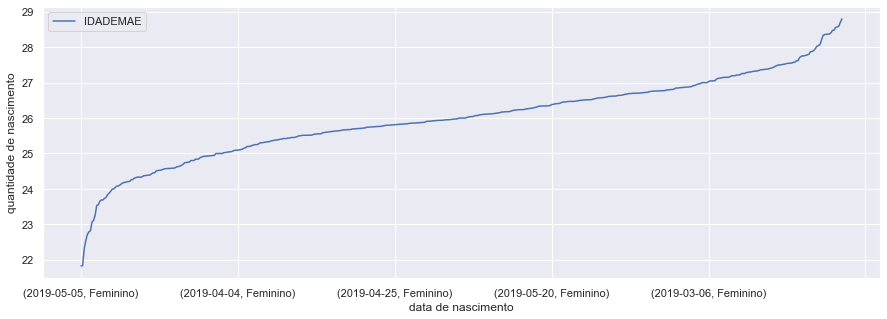

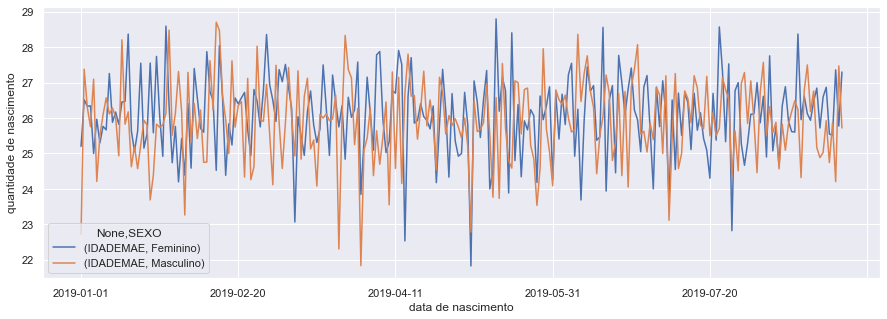

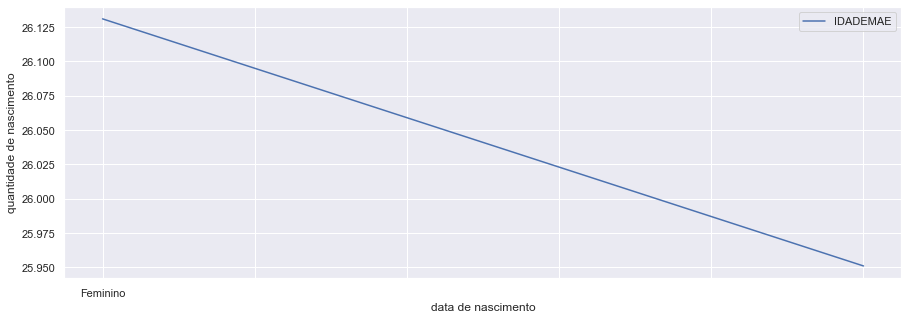

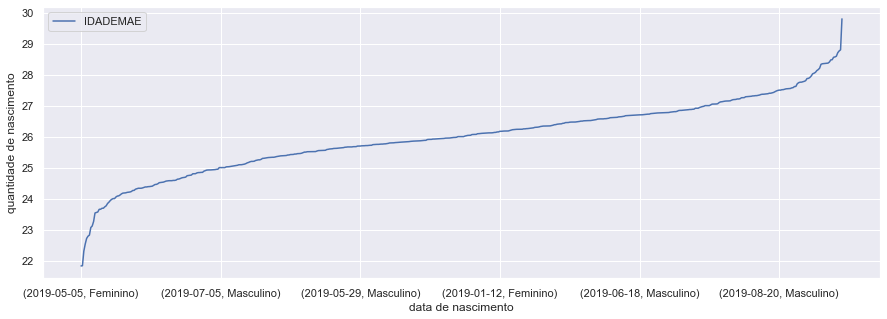

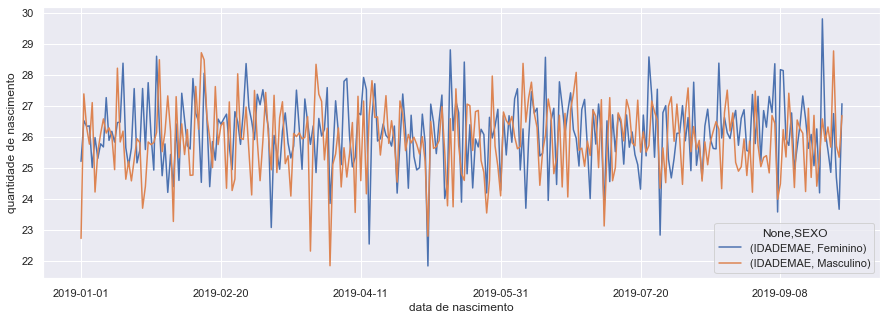

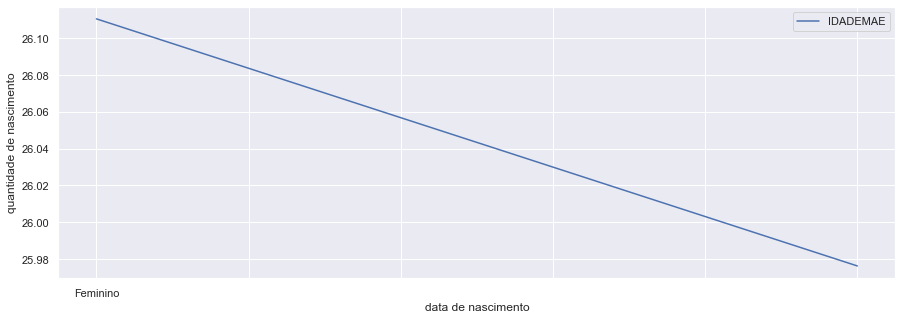

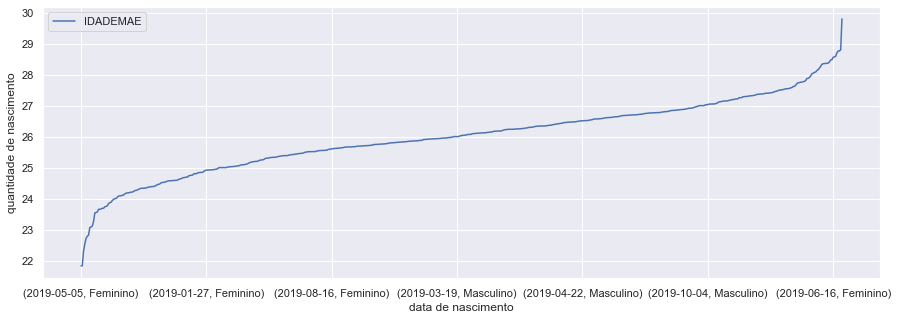

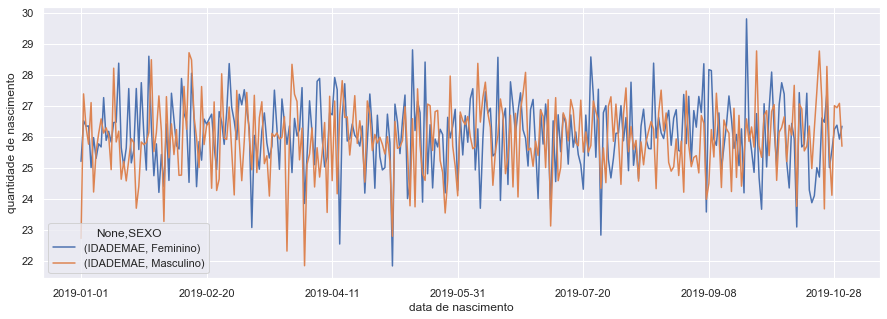

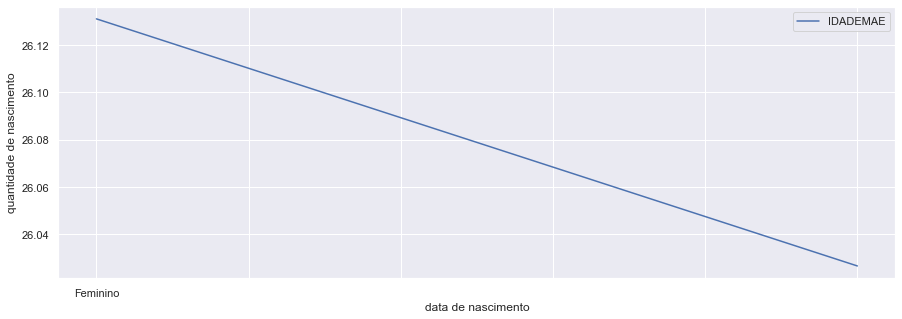

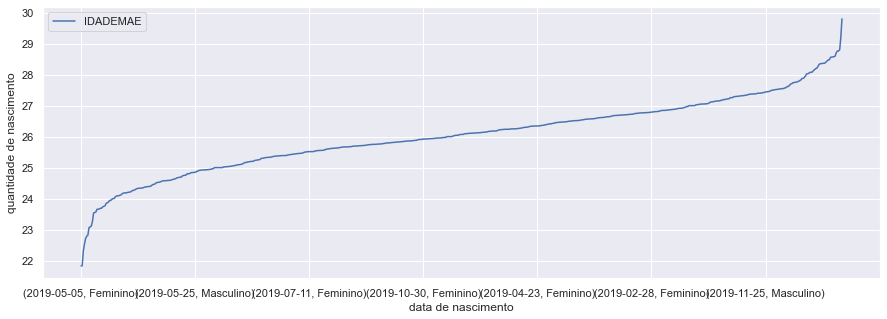

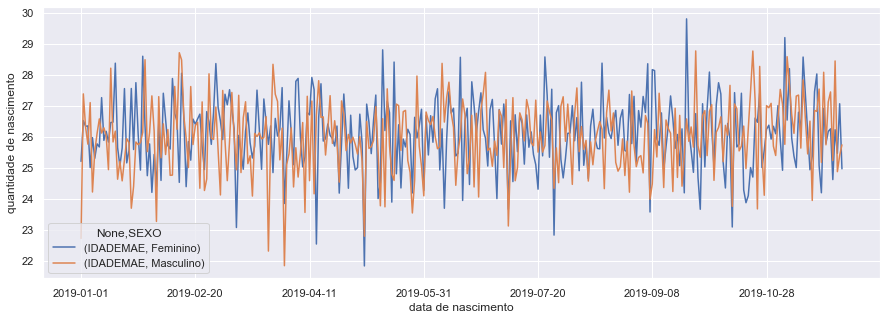

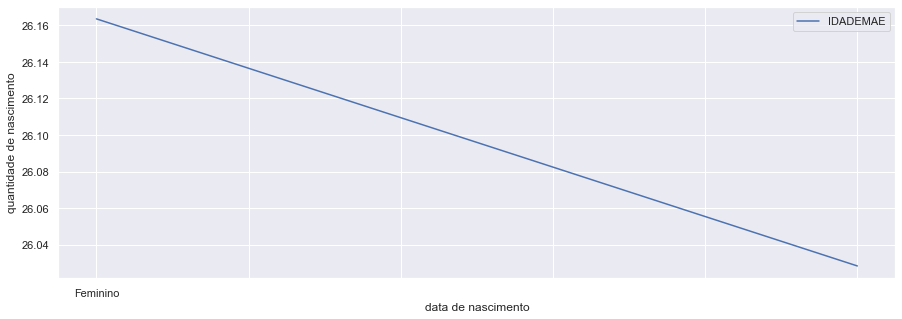

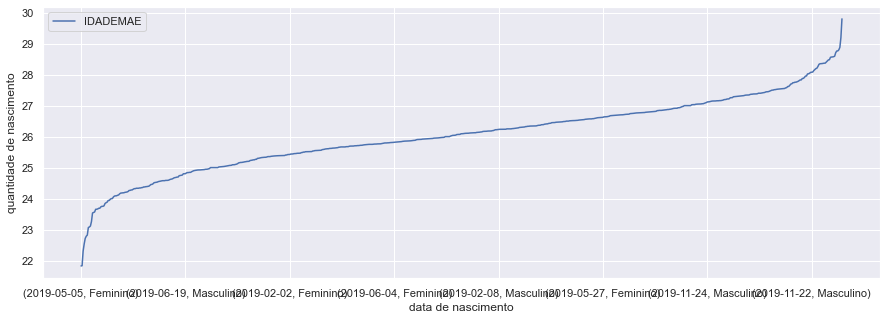

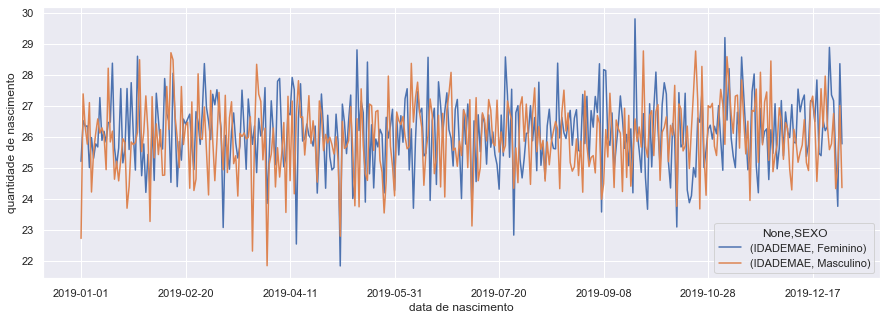

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set()

def gerar_grafico(data,value,index,func,ylabel,xlabel,opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(data, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
            pd.pivot_table(data, values=value, index=index,
                           aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
            pd.pivot_table(data, values=value, index=index,
                           aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

df_jan=pd.read_csv('SINASC_RO_2019_JAN.csv')
df_fev=pd.read_csv('SINASC_RO_2019_FEV.csv')
df_mar=pd.read_csv('SINASC_RO_2019_MAR.csv')
df_abr=pd.read_csv('SINASC_RO_2019_ABR.csv')
df_mai=pd.read_csv('SINASC_RO_2019_MAI.csv')
df_jun=pd.read_csv('SINASC_RO_2019_JUN.csv')
df_jul=pd.read_csv('SINASC_RO_2019_JUL.csv')
df_ago=pd.read_csv('SINASC_RO_2019_AGO.csv')
df_set=pd.read_csv('SINASC_RO_2019_SET.csv')
df_out=pd.read_csv('SINASC_RO_2019_OUT.csv')
df_nov=pd.read_csv('SINASC_RO_2019_NOV.csv')
df_dez=pd.read_csv('SINASC_RO_2019_DEZ.csv')

lista=[df_jan,df_fev,df_mar,df_abr,df_mai,df_jun,df_jul,df_ago,df_set,df_out,df_nov,df_dez]

for mes in lista:
    max_data = mes.DTNASC.max()[:7]
    print(max_data)

    os.makedirs('./output/figs/'+max_data, exist_ok=True)


    gerar_grafico(mes,'IDADEMAE','SEXO','mean','quantidade de nascimento','data de nascimento');
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    gerar_grafico(mes,'IDADEMAE',['DTNASC','SEXO'],'mean','quantidade de nascimento','data de nascimento',opcao='sort');
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    gerar_grafico(mes,'IDADEMAE',['DTNASC','SEXO'],'mean','quantidade de nascimento','data de nascimento',opcao='unstack');
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')
